In [1]:
from neuron import h, gui
from neuron.units import mV, ms, um #deafults are based on the squid giant axon diam 500um Ra 35.4 OhmCm h.celus 6.3C
from neuron import rxd
import plotly

In [2]:
#Loads 'standar run' system. Provide the h.continuerun function for runnin a simulation until a specific time
h.load_file("stdrun.hoc")

1.0

In [3]:
# #Basic unit in NEURON is the section. Where the stuff goes on
# #It's a length of unbranched cable
# Creating a section is just creating a space where cable theory works. We need to add mechanism to it. 
# apical = h.Section(name="apical")
# soma = h.Section(name="soma")
# soma = h.Section(name="soma", cell=self) #If we are inside a class, we need to specify the cell argument. Also, HH channels are not for mammals. 

In [4]:
# soma.L
# soma.diam
# soma.nseg #To discretize into segements. Should use odd number to avoid midpoint ambiguity. We can stick section together using connect

In [5]:
h.topology()

1.0

In [6]:
# class Pyramidal:
#     def __init__(self):
#         self.soma = h.Section(name="soma", cell=self)
#         self.soma.L = self.soma.diam = 10 #um
# pyr1 = Pyramidal()
# print(pyr1.soma.diam)

In [7]:
class Cell:
    def __init__(self):
        main = h.Section(name="main", cell=self)
        dend1 = h.Section(name="den1", cell=self)
        dend2 = h.Section(name="den2", cell=self)

        dend1.connect(main)
        dend2.connect(main)

        main.diam = 10 * um
        dend1.diam = 2 * um
        dend2.diam = 2 * um

        #Store the sections to the self cell
        self.main = main
        self.dend1 = dend1
        self.dend2 = dend2
        self.all = main.wholetree()

In [8]:
#OJO. .mod file to keep track of the concentrations. How do we create a .mod file?

my_cell= Cell()
my_cell.main.v = 50
my_cell.dend1.v = 0
my_cell.dend2.v = -65

ps = h.PlotShape(True)
ps.variable("v")
ps.scale(-80,80)
ps.plot(plotly).show()

In [ ]:
#pointer (for recording)
# seg._ref_v
#insert methjod (distributed mechanism that is not a point a process) to insert a mechanismo in a particular section
# h.hh.insert(apical)
# h.hh.insert(h.allsec())
# h.hh.insert([list of sections])



In [ ]:
#insert methjod to insert a mechanismo in a particular section
#

In [10]:
## Running simulation basics
h.load_file('stdrun.hoc') #If we load the GUI, we don't need it
h.finitialize(-65 * mV)
h.continuerun(10 * ms)
#h.fadvance() #advance one time step

0.0

In [ ]:
#Simulate and AP
axon = h.Section(name='axon')


<function matplotlib.pyplot.show(close=None, block=None)>

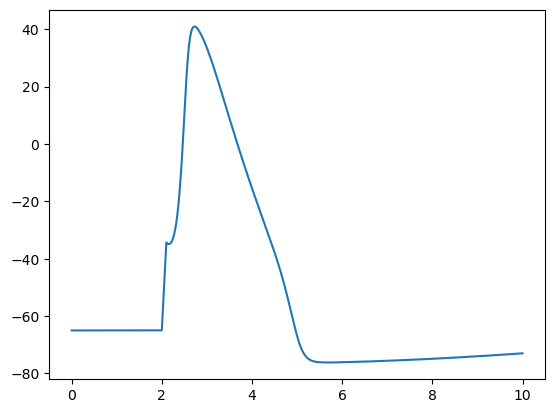

In [13]:
#Example HH
from neuron import h
from neuron.units import ms, mV, um
import matplotlib.pyplot as plt
h.load_file("stdrun.hoc")

soma = h.Section(name='soma')
soma.L = soma.diam = 10 * um
h.hh.insert(soma)

ic = h.IClamp(soma(0.5))
ic.delay = 2 * ms
ic.dur = 0.1 * ms
ic.amp = 1 #nA

t= h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)

h.finitialize(-65 *mV)
h.continuerun(10* ms)

plt.plot(t,v)
plt.show


spike times [3.225000000100012, 28.20000000009893, 41.70000000010092]


<function matplotlib.pyplot.show(close=None, block=None)>

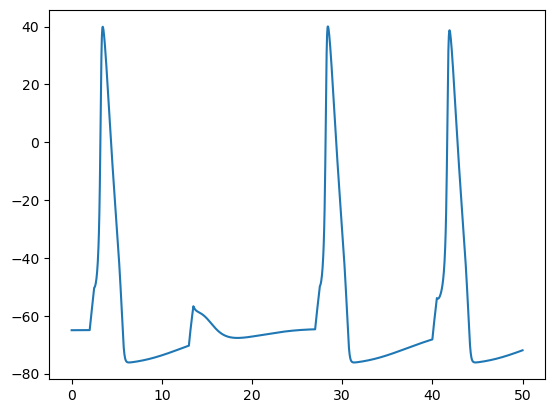

In [15]:
#example spike Detection
#Example HH
from neuron import h
from neuron.units import ms, mV, um
import matplotlib.pyplot as plt
h.load_file("stdrun.hoc")

axon = h.Section(name='axon')
h.hh.insert(axon)

#Several current injections
iclamps = []
for input_time in [2*ms, 13*ms, 27*ms, 40*ms]:
        
    ic = h.IClamp(axon(0.5))
    ic.delay = input_time
    ic.dur = 0.5 * ms
    ic.amp = 50 #nA
    iclamps.append(ic)


t= h.Vector().record(h._ref_t)
v = h.Vector().record(axon(0.5)._ref_v)
#Record spikes. Where is the threshold set at?
nc = h.NetCon(axon(0.5)._ref_v, None, sec=axon)
spike_times = h.Vector()
nc.record(spike_times)

h.finitialize(-65 *mV)
h.continuerun(50* ms)
print("spike times", list(spike_times))
plt.plot(t,v)
plt.show